<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">


# Telecomm EDA Challenge Lab

_Author: Alex Combs (NYC) _

---

Let's do some Exploratory Data Analysis (EDA)! As a data scientist, you often may find yourself given a data set you've never seen before, and asked to do a rapid analysis. This is today's goal.

# Prompt

You work for a telecommunications company. The company has been storing metadata about customer phone usage, as part of the regular course of business. Currently, this data is sitting in an unsecured database. The company doesn't want to pay to increase their database security, because they don't think there's really anything to be learned from the metadata.

They are under pressure from "right to privacy" organizations to beef up the database security. These organizations argue that you can learn a lot about a person from their cell phone metadata.

The telecom company wants to understand if this is true, and they want your help. They will give you one person's metadata for 2014 and want to see what you can learn from it.

Working in teams, create a report revealing everything you can about the person. Prepare a presentation, with slides, showcasing your findings.


# The Data

The [person's metadata](./datasets/metadata.csv) has the following fields:

| Field Name          | Description
| ---                 | ---
| **Cell Cgi**        | cell phone tower identifier
| **Cell Tower**      | cell phone tower location
| **Comm Identifier** |	de-identified recipient of communication
| **Comm Timedate String** | time of communication
| **Comm Type	Id**  | type of communication
| **Latitude**        | latitude of communication
| **Longitude**       | longitude of communication


# Hints

This is totally open-ended! If you're totally stumped -- and only if stumped -- should you look below for prompts. As a starting point, given that you have geo-locations, consider investigating ways to display this type of information (i.e. mapping functionality).

<font color='white'>
Well for starters, he's in Australia!

Ideas for things to look into:
- where does he work?
- where does he live?
- who does he contact most often?
- what hours does he work?
- did he move?
- did he go on holiday?  If so, where did he go?
- did he get a new phone?

Challenges:
- how does he get to work?
- where does his family live?
- if he went on holiday, can you find which flights he took?
- can you guess who some of his contacts are, based on the frequency, location, time and mode (phone/text) of communications?


If you're stuck on how to map the data, you can try "basemap" or "gmplot", or anything else you find online.

</font>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import numpy as np
import datetime as dt

%matplotlib inline

In [2]:
#Import file
file_location = 'datasets/metadata.csv'
df = pd.read_csv(file_location)

In [3]:
#Data Exploration/Understanding:
df.describe()
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10476 entries, 0 to 10475
Data columns (total 7 columns):
Cell Cgi                10476 non-null object
Cell Tower Location     10476 non-null object
Comm Identifier         1374 non-null object
Comm Timedate String    10476 non-null object
Comm Type               10476 non-null object
Latitude                10476 non-null float64
Longitude               10476 non-null float64
dtypes: float64(2), object(5)
memory usage: 573.0+ KB


,Cell Cgi,Cell Tower Location,Comm Identifier,Comm Timedate String,Comm Type,Latitude,Longitude
0,50501015388B9,REDFERN TE,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 9:40,Phone,-33.892933,151.202296
1,50501015388B9,REDFERN TE,62157ccf2910019ffd915b11fa037243b75c1624,4/1/14 9:42,Phone,-33.892933,151.202296
2,505010153111F,HAYMARKET #,c8f92bd0f4e6fb45ed7fce96fc831b283db2b642,4/1/14 13:13,Phone,-33.880329,151.205690
3,505010153111F,HAYMARKET #,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 13:13,Phone,-33.880329,151.205690
4,5.05E+106,HAYMARKET #,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 17:27,Phone,-33.880329,151.205690


# Plotting data using geopandas, I want to see the coordinates on a map.

In [4]:
#Create a column with coordinates, pairing up Longitude and Latitude.
#Then I'm going to use Geopandas to plot the data in a map.
geometry = [Point(xy) for xy in zip(df['Longitude'],df['Latitude'])]
geo_df = gpd.GeoDataFrame(df, geometry = geometry)

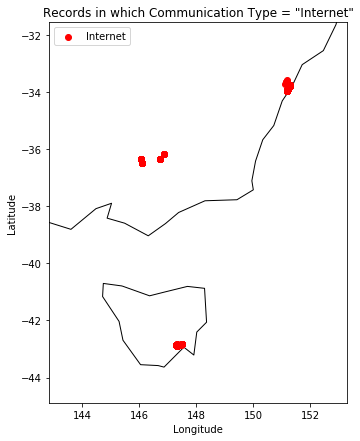

In [5]:
# Downloading map information from database
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# We restrict to Oceania.
ax = world[world.continent == 'Oceania'].plot(color='white', edgecolor='black', figsize = (7,7))

# Define max and min of both axis, to make it visually look pleasant.
minx, miny, maxx, maxy = geo_df.total_bounds
ax.set_xlim(minx - 2, maxx + 2)
ax.set_ylim(miny - 2, maxy + 2)

# We can now plot our GeoDataFrame.
# Here I'm plotting only records in which the Communication Type is 'Internet'.
# I'm trying to see if the user communicates differently depending on the location.
geo_df[geo_df['Comm Type'] == 'Internet'].plot(ax=ax, color='red', label = 'Internet')

#Title and labels
plt.title('Records in which Communication Type = "Internet"')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc='upper left')
plt.show();

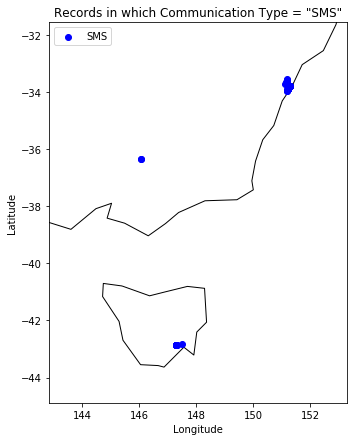

In [6]:
#Second plot: Now using SMS as Communication Type.
# We restrict to Oceania.
ax = world[world.continent == 'Oceania'].plot(color='white', edgecolor='black', figsize = (7,7))

# Define max and min of my axis.
minx, miny, maxx, maxy = geo_df.total_bounds
ax.set_xlim(minx - 2, maxx + 2)
ax.set_ylim(miny - 2, maxy + 2)
geo_df[geo_df['Comm Type'] == 'SMS'].plot(ax=ax, color='blue', label = 'SMS')

#Title and labels
plt.title('Records in which Communication Type = "SMS"')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc='upper left')
plt.show()

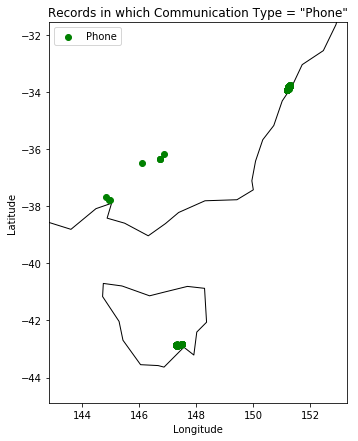

In [7]:
#Third Chart: Same thing, but using 'Phone' as the Communication Type.
# We restrict to Oceania.
ax = world[world.continent == 'Oceania'].plot(color='white', edgecolor='black', figsize = (7,7))

# Define max and min of my axis.
minx, miny, maxx, maxy = geo_df.total_bounds
ax.set_xlim(minx - 2, maxx + 2)
ax.set_ylim(miny - 2, maxy + 2)
geo_df[geo_df['Comm Type'] == 'Phone'].plot(ax=ax, color='green', label = 'Phone')

#Title and labels
plt.title('Records in which Communication Type = "Phone"')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc='upper left')
plt.show()

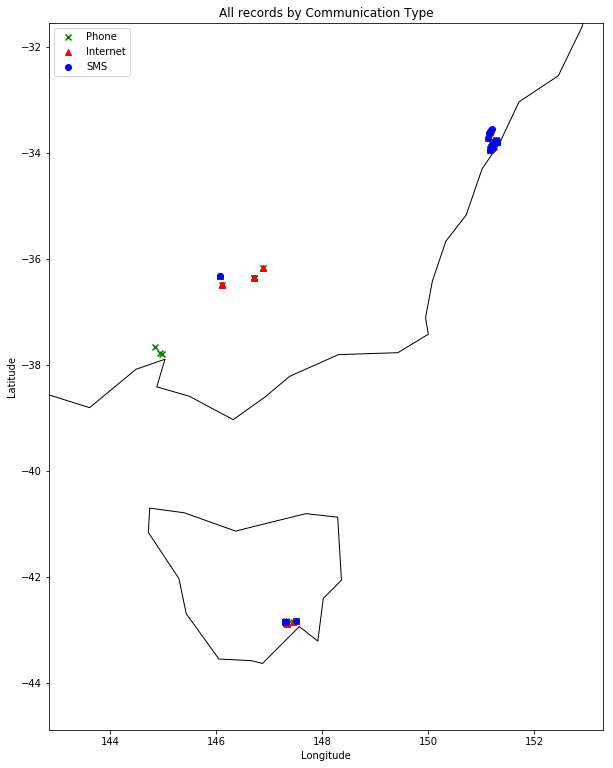

In [8]:
#Fourth Chart: Let's see them all together
# We restrict to Oceania.
ax = world[world.continent == 'Oceania'].plot(color='white', edgecolor='black', figsize = (13,13))

# Define max and min of my axis.
minx, miny, maxx, maxy = geo_df.total_bounds
ax.set_xlim(minx - 2, maxx + 2)
ax.set_ylim(miny - 2, maxy + 2)
geo_df[geo_df['Comm Type'] == 'Phone'].plot(ax=ax, color='green', label = 'Phone', marker = 'x')
geo_df[geo_df['Comm Type'] == 'Internet'].plot(ax=ax, color='red', label = 'Internet', marker = '^')
geo_df[geo_df['Comm Type'] == 'SMS'].plot(ax=ax, color='blue', label = 'SMS', marker = 'o')

#Title and labels
plt.title('All records by Communication Type')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc='upper left')
plt.show()

### It's interesting to see that the user doesn't communicate through SMS in all places (note (146,37) and (145, 38)). Besides, in (145, 38), the person only uses the phone, no SMS or Internet. 

In [9]:
#I'm curious to see the total count of each Communication Type.
df.groupby(['Comm Type']).count()['Latitude']

Comm Type
Internet    9102
Phone        717
SMS          657
Name: Latitude, dtype: int64

### Apparently, the user communicates more through the Internet.

## I wonder if we could find any trends or patterns using dates and location ...

In [10]:
#Basic updates:
#Converting the Comm Timedate String column into a datetime and assigning it to a different column.
#Then, I'm going to sort by date and reset my index, because I want my dataframe to be indexed on dates.
df['communication_time'] = pd.to_datetime(df['Comm Timedate String'])
df = df.sort_values(by='Comm Timedate String').reset_index()

#I'm going to strip the date into different columns, creating columns for Year, Month, Weekday, Hour and Day.
df['communication_year'] = df['communication_time'].map(lambda x: x.year)
df['communication_month'] = df['communication_time'].map(lambda x: x.month)
df['communication_weekday'] = df['communication_time'].map(lambda x: x.weekday())
df['communication_hour'] = df['communication_time'].map(lambda x: x.time())
df['communication_day'] = df['communication_time'].map(lambda x: x.day)
df['just_date'] = df['communication_time'].dt.date

## Now, my idea is to group similar locations, so I have less groups to analyze. Based on the map above I see 4 different locations. I'm going to label them 1, 2, 3 and 4.

In [11]:
#In order to do that, first of all, I'm going to concatenate theLatitude and Longitude columns and convert them 
#into strings, this will help be to efficiently categorize them.
df['geometry_string'] = df['Latitude'].map(lambda x: str(round(x))) + ', ' + df['Longitude'].map(lambda x: str(round(x)))
df['geometry_string'].unique() # to get the unique combinations and create the conditions below.

#Create a new column for the category and set the value to zero. Then, update the column based on the coordinates.
df['geometry_category'] = 0
df['geometry_category'].loc[(df['geometry_string'] == '-36, 146') | (df['geometry_string'] == '-36, 147')] = 1
df['geometry_category'].loc[(df['geometry_string'] == '-37, 146') | (df['geometry_string'] == '-38, 145')] = 2
df['geometry_category'].loc[(df['geometry_string'] == '-43, 148') | (df['geometry_string'] == '-43, 147')] = 3
df['geometry_category'].loc[(df['geometry_string'] == '-34, 151')] = 4
df.head(5)

/Users/reno/anaconda2/envs/py365/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,index,Cell Cgi,Cell Tower Location,Comm Identifier,Comm Timedate String,Comm Type,Latitude,Longitude,geometry,communication_time,communication_year,communication_month,communication_weekday,communication_hour,communication_day,just_date,geometry_string,geometry_category
0,6439,505012056EF02,BALGOWLAH HAYES ST,NaN,1/1/15 0:19,Internet,-33.788150,151.266540,POINT (151.26654 -33.78815),2015-01-01 00:19:00,2015,1,3,00:19:00,1,2015-01-01,"-34, 151",4
1,6440,505012056EF02,BALGOWLAH HAYES ST,NaN,1/1/15 0:19,Internet,-33.788150,151.266540,POINT (151.26654 -33.78815),2015-01-01 00:19:00,2015,1,3,00:19:00,1,2015-01-01,"-34, 151",4
2,6441,505012056EF02,BALGOWLAH HAYES ST,NaN,1/1/15 0:20,Internet,-33.788150,151.266540,POINT (151.26654 -33.78815),2015-01-01 00:20:00,2015,1,3,00:20:00,1,2015-01-01,"-34, 151",4
3,6480,5.05E+12,HARBORD 22 WAINE ST,NaN,1/1/15 10:01,Internet,-33.779333,151.276901,POINT (151.276901 -33.779333),2015-01-01 10:01:00,2015,1,3,10:01:00,1,2015-01-01,"-34, 151",4
4,6479,5.05E+12,HARBORD 22 WAINE ST,NaN,1/1/15 10:01,Internet,-33.779333,151.276901,POINT (151.276901 -33.779333),2015-01-01 10:01:00,2015,1,3,10:01:00,1,2015-01-01,"-34, 151",4


### Let's start playing with dates and location categories.

In [12]:
#I'm going to create a new dataframe and group the date and category columns, then I'm going to use a count just to
#create my dataframe, after that the count column will be deleted.
df_justdate = pd.DataFrame(df.groupby(['just_date','geometry_category']).count()['communication_year'].reset_index())
df_justdate.drop('communication_year',1, inplace = True)
df_justdate.set_index(['just_date'],inplace=True)

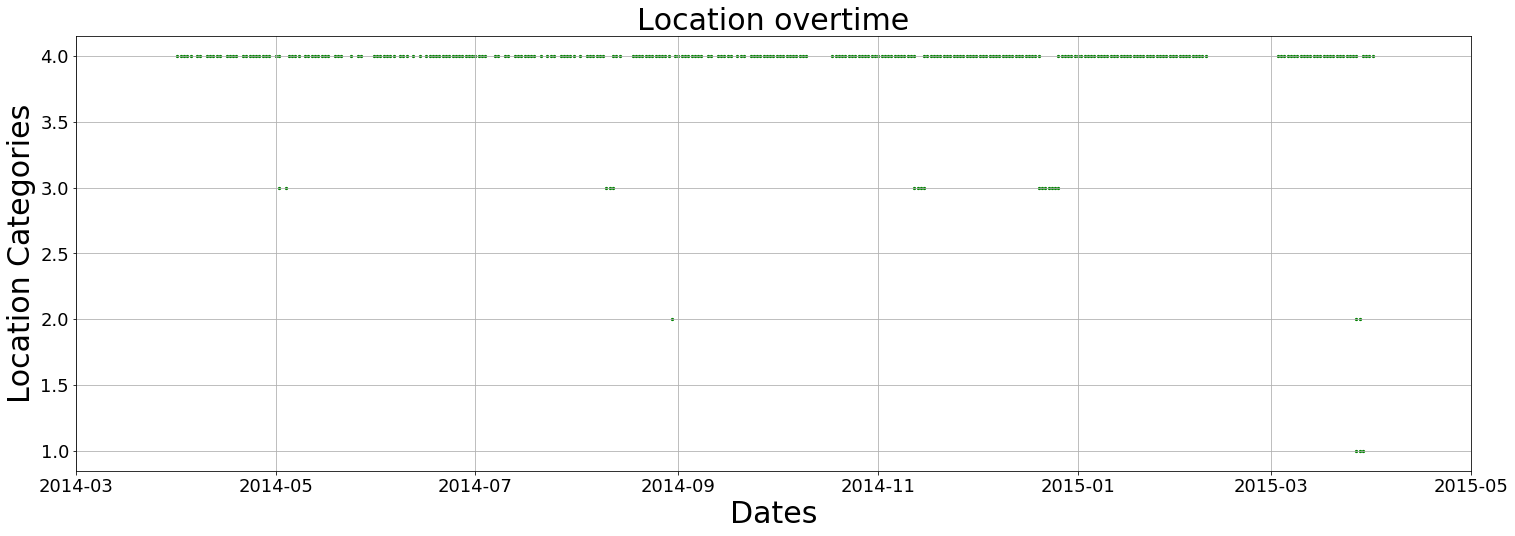

In [13]:
#It's time to plot that! 
plt.figure(figsize=(25,8))
plt.title('Location overtime', fontsize = 30)
plt.xlabel('Dates', fontsize = 30)
plt.ylabel('Location Categories', fontsize = 30)
plt.grid()
plt.xlim([dt.date(2014, 3, 1), dt.date(2015, 5, 1)])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.scatter(df_justdate.index, df_justdate['geometry_category'], s = 5, c = 'green');

#### Based on the chart above, it's possible to conclude the following:
- The user spends most of the time in location 4 (151,-34). 
- Between mid-Feb and beginning of March, we have no data. A possibility would be that the person is on vacation or the telephone was in repair.
- It's possible to say that the user regularly goes to location 3. The difference between the first-second and second-third points is almost the same (4 months) and somewhere around the end of the year we have some records too. My theory would be that it's a family location, like the parents house or something like that.

In [14]:
#I'm curious to see the count of each category.
df_justdate['count'] = 1
df_justdate.groupby('geometry_category').count()['count']

geometry_category
1      3
2      3
3     16
4    292
Name: count, dtype: int64

#### Same conclusions stated by the chart above. The user spends most of the time in location 4.

## Now I'm going to create the same chart by Communication Type, I wonder if certain type of communication is preferred depending on the loation.

## First I'm going to start with Phone data:

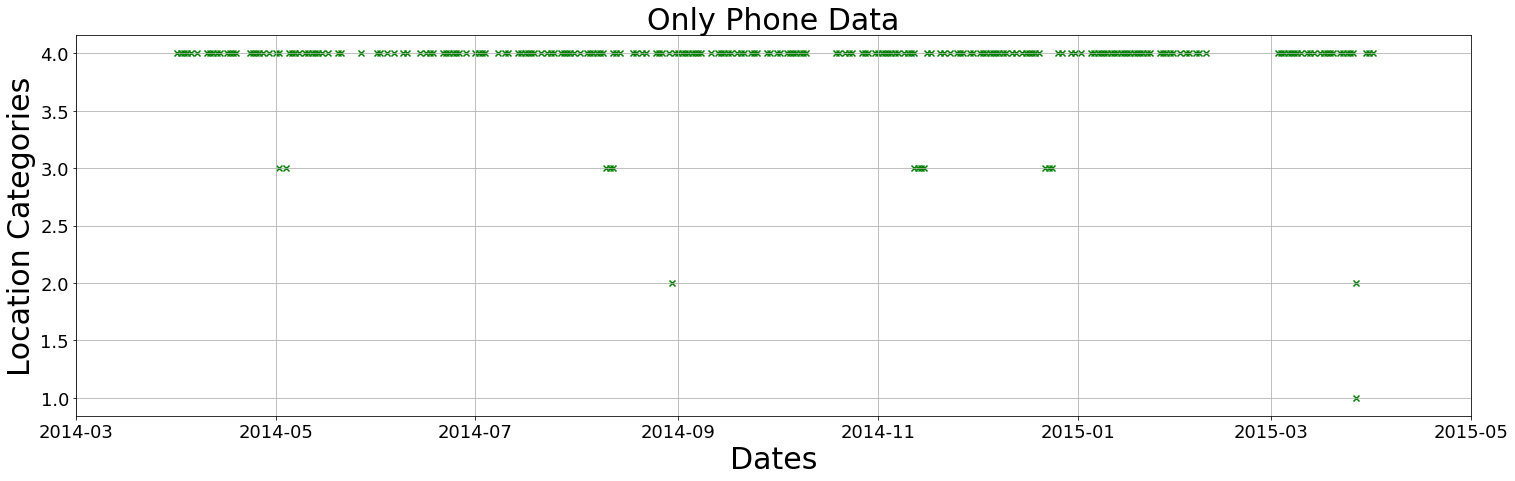

In [15]:
#Filtering my dataframe to include only Phone.
df_justdate_phone = pd.DataFrame(df[df['Comm Type'] == 'Phone'].groupby(['just_date','geometry_category']).count()['communication_year'].reset_index())
df_justdate_phone.reset_index(inplace=True)
df_chart_phone = pd.DataFrame(df_justdate_phone, columns = ['just_date','geometry_category'])
df_chart_phone.set_index(['just_date'],inplace=True)
plt.figure(figsize=(25,7))
plt.title('Only Phone Data', fontsize = 30)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim([dt.date(2014, 3, 1), dt.date(2015, 5, 1)])
plt.grid()
plt.xlabel('Dates', fontsize = 30)
plt.ylabel('Location Categories', fontsize = 30)
plt.scatter(df_chart_phone.index, df_chart_phone['geometry_category'],color='green', label = 'Phone', marker = 'x');

## Now, SMS Data:

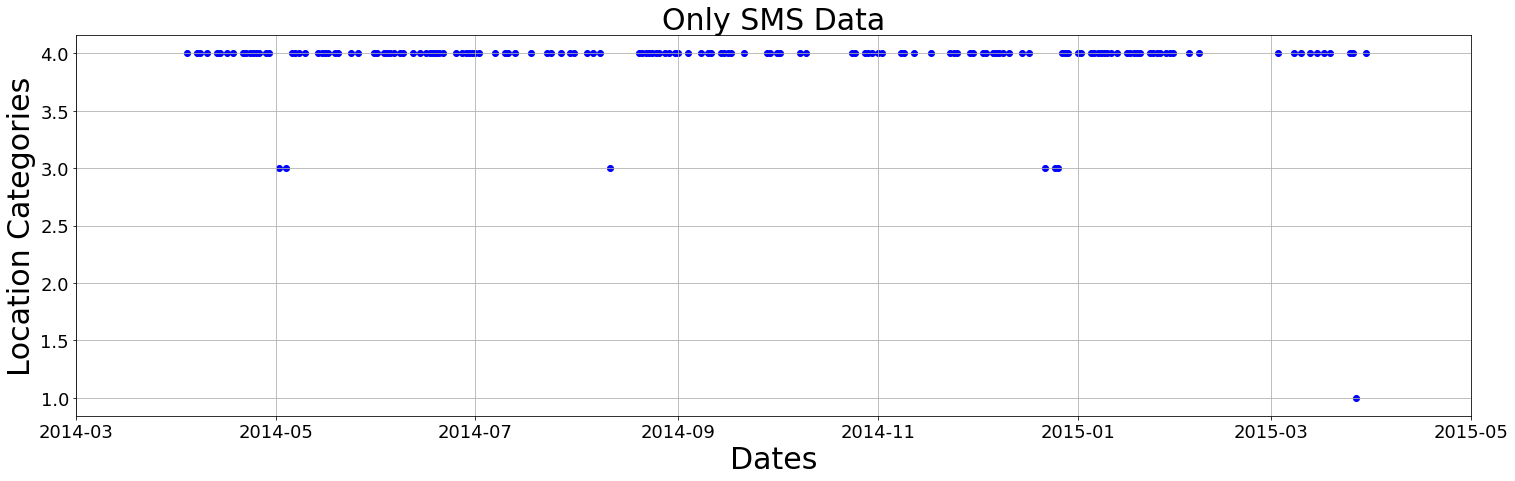

In [16]:
#Filtering my dataframe to include only SMS.
df_justdate_sms = pd.DataFrame(df[df['Comm Type'] == 'SMS'].groupby(['just_date','geometry_category']).count()['communication_year'].reset_index())
df_justdate_sms.reset_index(inplace=True)
df_chart_sms = pd.DataFrame(df_justdate_sms, columns = ['just_date','geometry_category'])
df_chart_sms.set_index(['just_date'],inplace=True)
plt.figure(figsize=(25,7))
plt.title('Only SMS Data', fontsize = 30)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim([dt.date(2014, 3, 1), dt.date(2015, 5, 1)])
plt.grid()
plt.xlabel('Dates', fontsize = 30)
plt.ylabel('Location Categories', fontsize = 30)
plt.scatter(df_chart_sms.index, df_chart_sms['geometry_category'], color='blue', label = 'SMS', marker = 'o');

## Finally, only Internet:

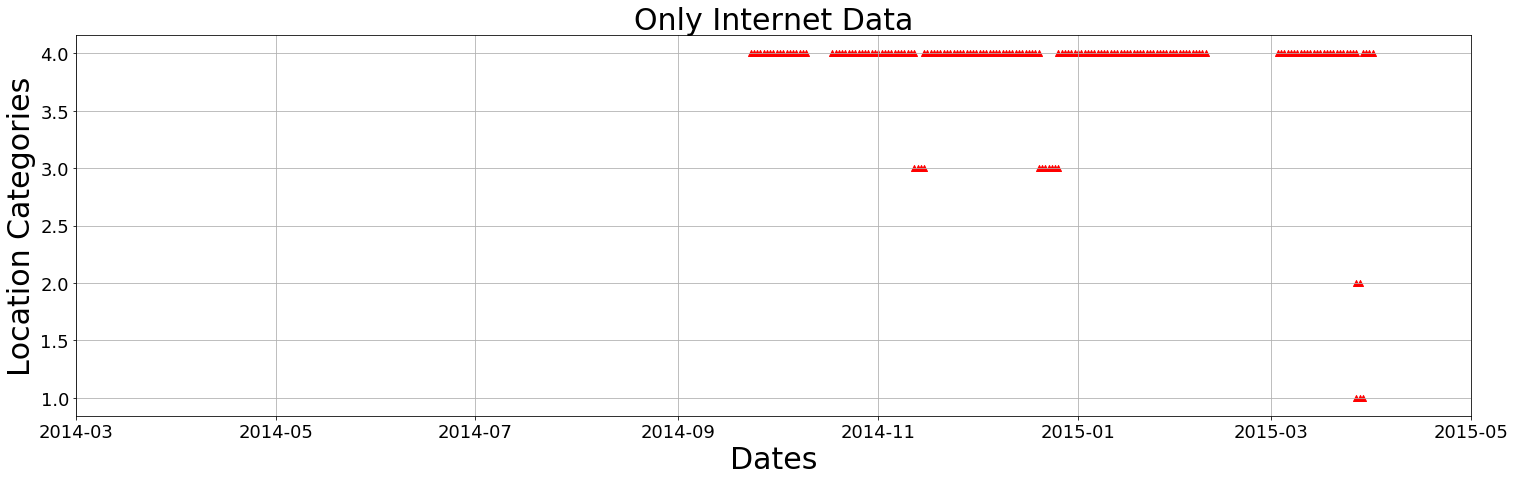

In [17]:
#Filtering my dataframe to include only Internet.
df_justdate_internet = pd.DataFrame(df[df['Comm Type'] == 'Internet'].groupby(['just_date','geometry_category']).count()['communication_year'].reset_index())
df_justdate_internet.reset_index(inplace=True)
df_chart_internet = pd.DataFrame(df_justdate_internet, columns = ['just_date','geometry_category'])
df_chart_internet.set_index(['just_date'],inplace=True)
plt.figure(figsize=(25,7))
plt.title('Only Internet Data', fontsize = 30)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim([dt.date(2014, 3, 1), dt.date(2015, 5, 1)])
plt.grid()
plt.xlabel('Dates', fontsize = 30)
plt.ylabel('Location Categories', fontsize = 30)
plt.scatter(df_chart_internet.index, df_chart_internet['geometry_category'], color='red', label = 'Internet', marker = '^');

### All data in one place:

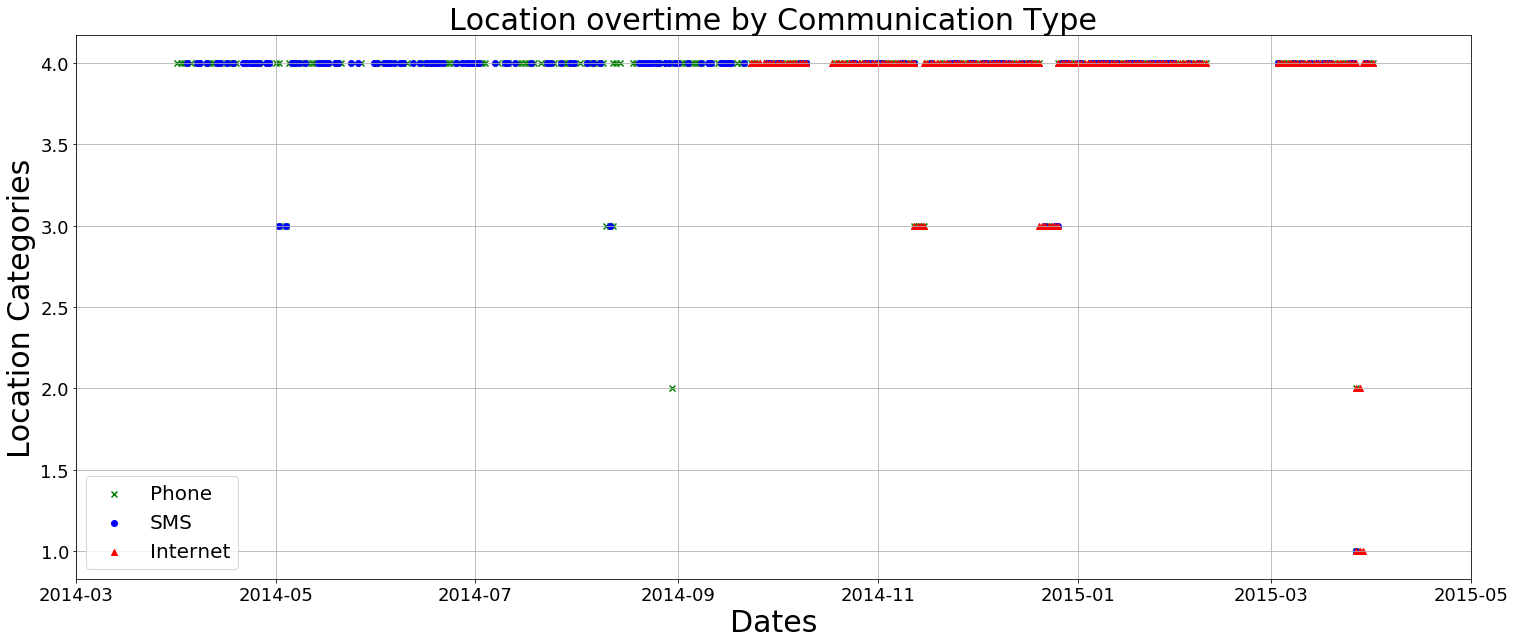

In [18]:
plt.figure(figsize=(25,10))
plt.title('Location overtime by Communication Type', fontsize = 30)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim([dt.date(2014, 3, 1), dt.date(2015, 5, 1)])
plt.grid()
plt.xlabel('Dates', fontsize = 30)
plt.ylabel('Location Categories', fontsize = 30)
plt.scatter(df_chart_phone.index, df_chart_phone['geometry_category'],color='green', label = 'Phone', marker = 'x')
plt.scatter(df_chart_sms.index, df_chart_sms['geometry_category'], color='blue', label = 'SMS', marker = 'o')
plt.scatter(df_chart_internet.index, df_chart_internet['geometry_category'], color='red', label = 'Internet', marker = '^')
plt.legend(prop={'size': 20});

### New conclusions:
#### The user didn't have Internet during all the period that we are analyzing. At the end of 2014, Internet was added to the cellphone plan.

## Now I'm curious to see if the addition of Internet had an impact on Phone and SMS numbers. My hypothesis is that Internet will replace phonecalls and texting.

In [19]:
#In order to do that, I'm going to count the number of monthly records per Communication Type.
#So, first I'm going to create the datafame that I'm going to work with.
internet_impact_df = pd.DataFrame(df.groupby(['Comm Type','communication_month','communication_year']).count()['Latitude']).reset_index()
internet_impact_df['date'] = pd.to_datetime(internet_impact_df['communication_year'].map(str) + '-' + internet_impact_df['communication_month'].map(str) + '-01')
internet_impact_df.drop(['communication_year','communication_month'],1, inplace = True)
internet_impact_df.columns = ['communication_type','count','date']
internet_impact_df.sort_values('date', inplace = True)
internet_impact_df.set_index(['date'],inplace = True)

#The final dataframe after grouping some columns, removing, renaming others and resetting the index is the following:
internet_impact_df.head()

,communication_type,count
date,,
2014-04-01,Phone,60
2014-04-01,SMS,98
2014-05-01,SMS,73
2014-05-01,Phone,47
2014-06-01,Phone,29


In [20]:
#Now I need to create a df for each type of communication type in order to plot that.
internet_records = internet_impact_df[internet_impact_df['communication_type'] == 'Internet']
sms_records = internet_impact_df[internet_impact_df['communication_type'] == 'SMS']
phone_records = internet_impact_df[internet_impact_df['communication_type'] == 'Phone']

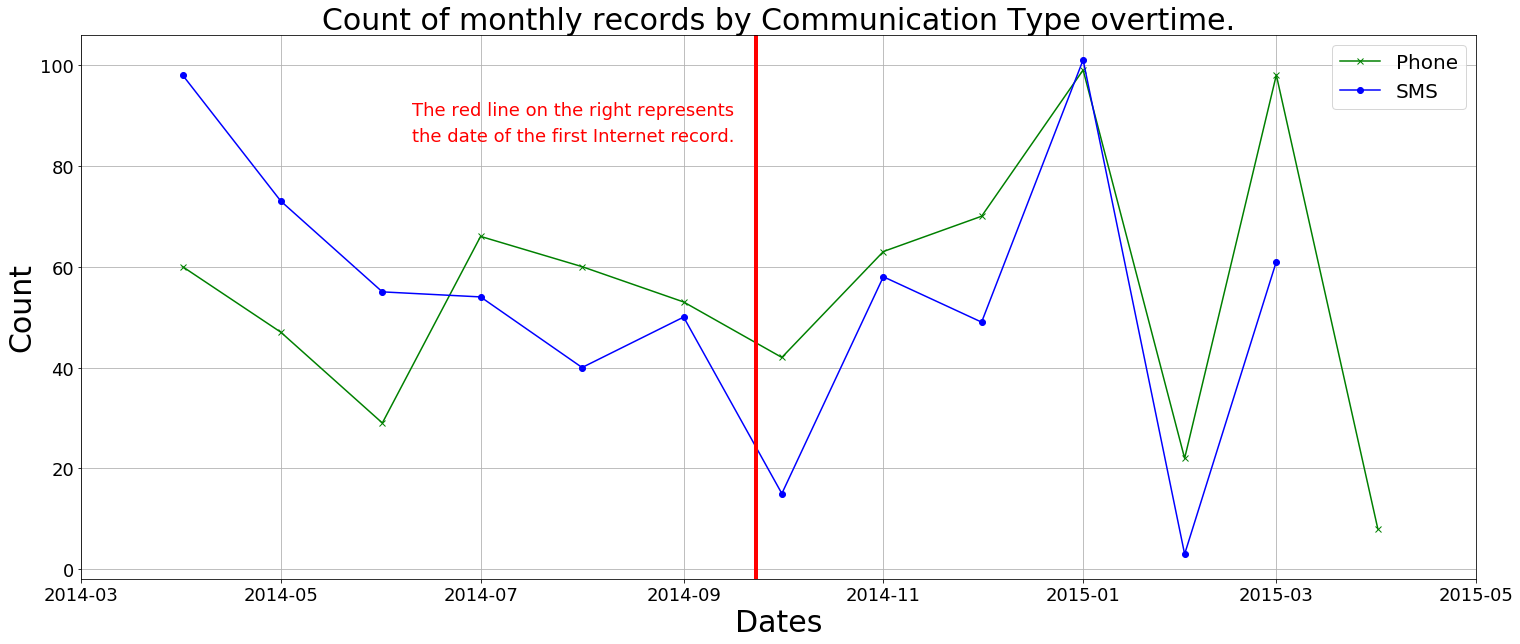

In [21]:
#Plotting
plt.figure(figsize=(25,10))
plt.title('Count of monthly records by Communication Type overtime.', fontsize = 30)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim([dt.date(2014, 3, 1), dt.date(2015, 5, 1)])
plt.grid()
plt.xlabel('Dates', fontsize = 30)
plt.ylabel('Count', fontsize = 30)
plt.plot(phone_records.index, phone_records['count'],color='green', label = 'Phone', marker = 'x')
plt.plot(sms_records.index, sms_records['count'], color='blue', label = 'SMS', marker = 'o')
plt.axvline(x='2014-09-23',linewidth=4, color = 'red')
plt.text('2014-06-10', 90, 'The red line on the right represents', fontsize=18, color = 'red')
plt.text('2014-06-10', 85, 'the date of the first Internet record.', fontsize=18, color = 'red')
plt.legend(prop={'size': 20});

### Well the conclusion is that my hypothesis was wrong, I don't see any changes, matter of fact, there was an increase on the monthly count of SMS and Phone records. Don't forget that 2015-Feb should be ignored, since it's that period in which we don't have data for the most part.

## Now it's time to use the Communication Identifier column, I want to know the top 5 contacts and in which time of the day the user communicates with them.

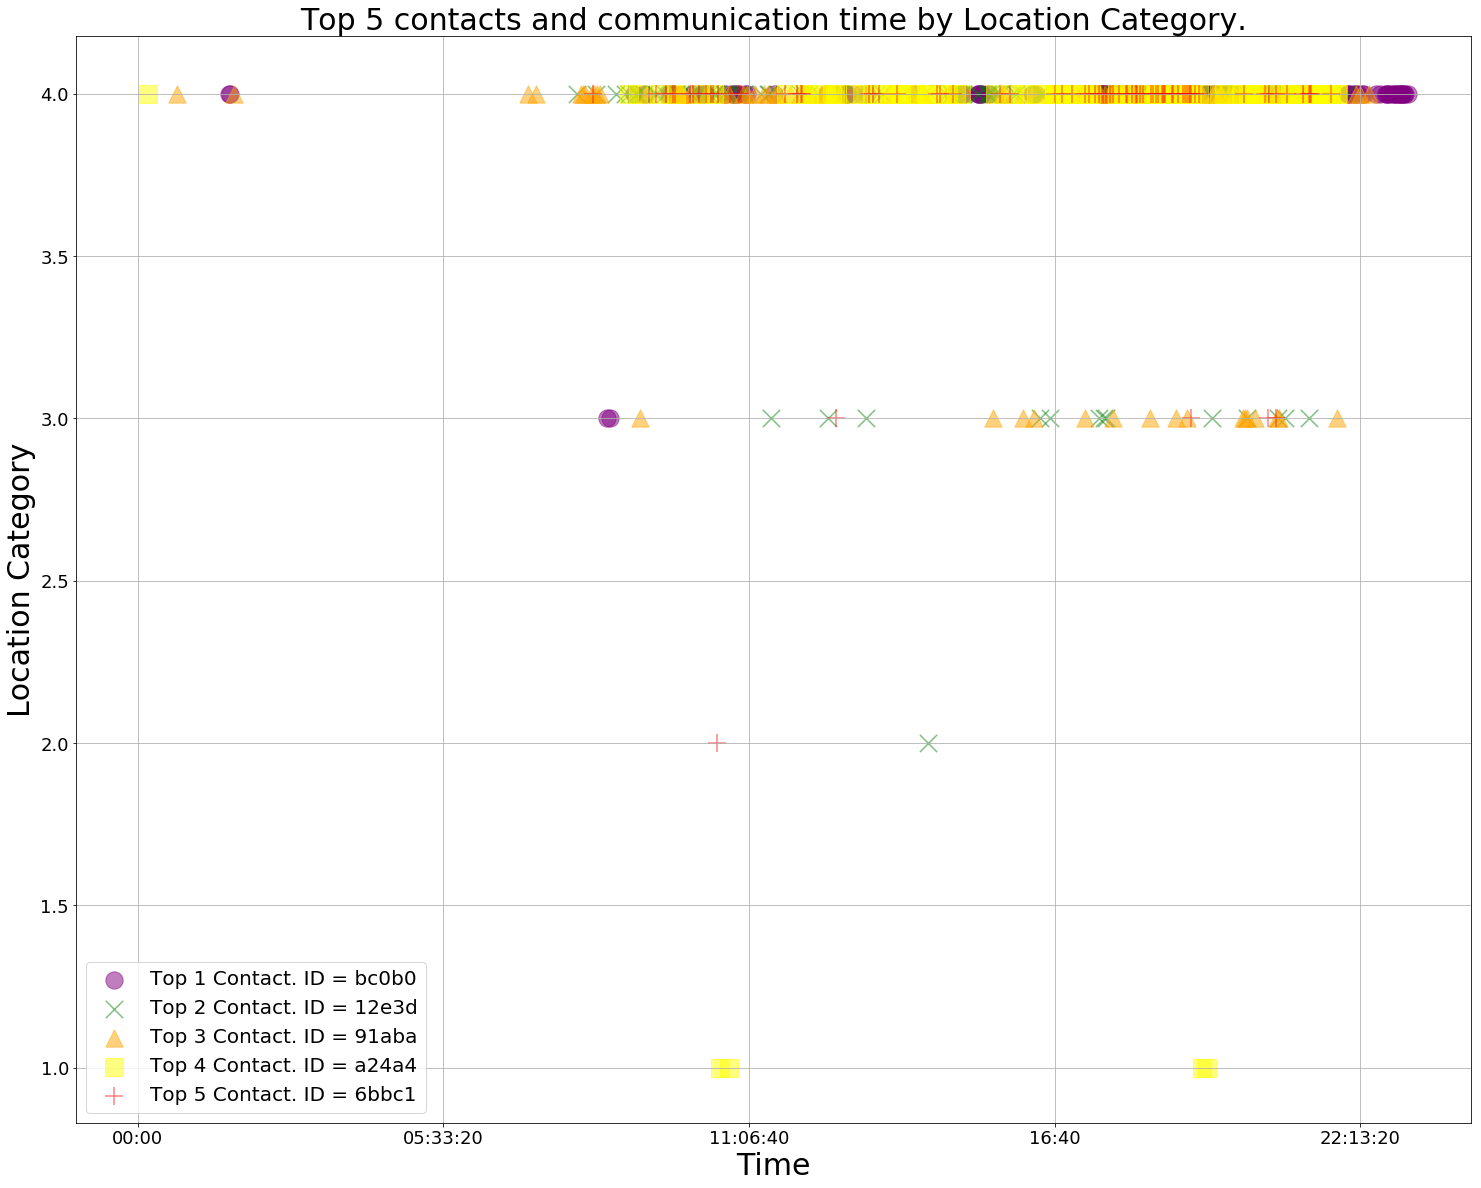

In [88]:
top_ids = pd.DataFrame(df.groupby('Comm Identifier').count()['Latitude'].sort_values(ascending=False).head(5)).reset_index()
top_ids = list(top_ids['Comm Identifier'])

plt.figure(figsize=(25,20))

for idx, comm_id in enumerate(top_ids):
    color = ['purple','green','orange','yellow','red']
    marker = ['o', 'x', '^', 's', '+']
    label = 'Top ' + str(idx + 1) + ' Contact. ID = ' + str(comm_id[:5])
    top_df = pd.DataFrame(df[df['Comm Identifier'] == comm_id].groupby(['communication_hour','geometry_category']).count()['communication_year'].reset_index())
    top_df.reset_index(inplace=True)
    top_df_chart = pd.DataFrame(top_df, columns = ['communication_hour','geometry_category'])
    top_df_chart.set_index(['communication_hour'],inplace=True)
    plt.scatter(top_df_chart.index, top_df_chart['geometry_category'], s = 300, c = color[idx], label = label, marker = marker[idx], alpha = .5)
    title = 'Top ' + str(len(top_ids)) + ' contacts and communication time by Location Category.'

plt.title(title, fontsize = 30)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid()
plt.xlabel('Time', fontsize = 30)
plt.ylabel('Location Category', fontsize = 30)
plt.legend(prop={'size': 20});

### It's hard to say what type of relationship the user might have with the contacts above, however, it's interesting to see that even though the top 1 contact has more records, when the user is outside of location 4, they don't communicate with each other a lot.

### Moreover, it's possible to see that the user probably wakes up around 7:30 - 8:00 am and goes to bed around 11pm.

### Another interesting point to make is that probably the user doesn't spend the day in locations 1 and 2, because the records of phone calls and text messages are really scarse.

## Now I'm wondering if my Top 5 would be the same if we analyze only weekends.

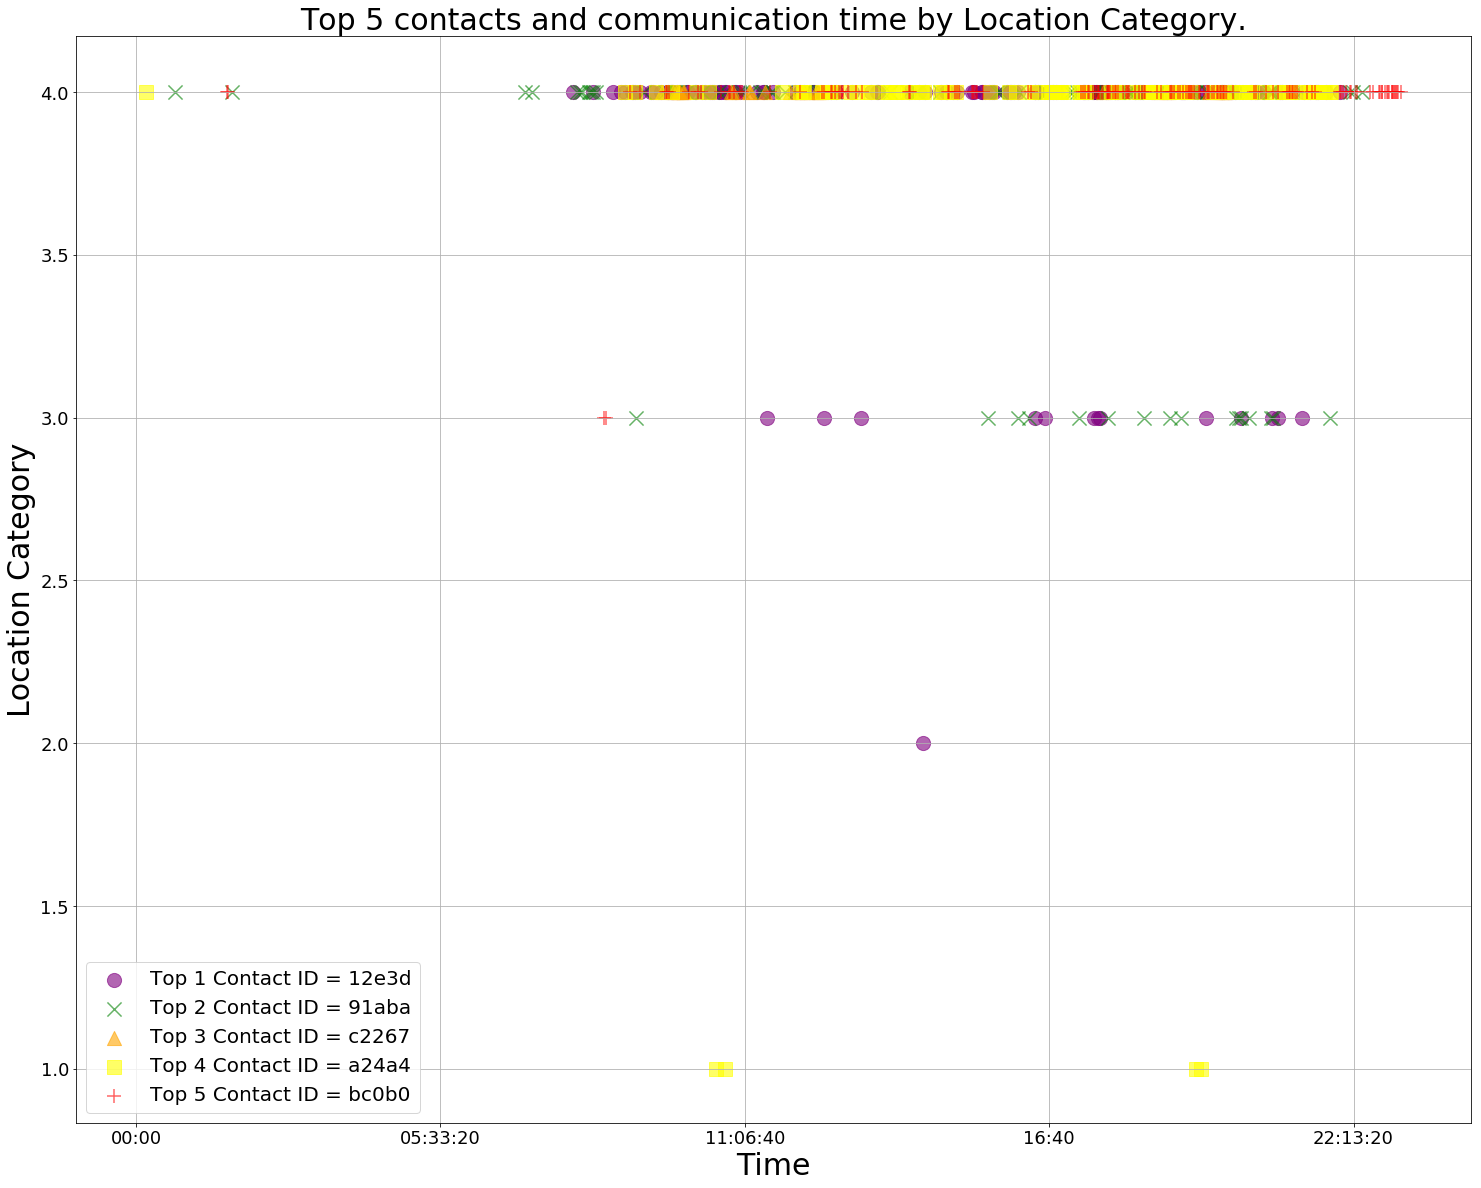

In [91]:
#Weekend Data Analysis
top_ids = pd.DataFrame(df[df['communication_weekday'] > 4].groupby('Comm Identifier').count()['Latitude'].sort_values(ascending=False).head(5)).reset_index()
top_ids = list(top_ids['Comm Identifier'])

plt.figure(figsize=(25,20))

for idx, comm_id in enumerate(top_ids):
    color = ['purple','green','orange','yellow','red']
    marker = ['o', 'x', '^', 's', '+']
    label = 'Top ' + str(idx + 1) + ' Contact ID = ' + str(comm_id[:5])
    top_df = pd.DataFrame(df[df['Comm Identifier'] == comm_id].groupby(['communication_hour','geometry_category']).count()['communication_year'].reset_index())
    top_df.reset_index(inplace=True)
    top_df_chart = pd.DataFrame(top_df, columns = ['communication_hour','geometry_category'])
    top_df_chart.set_index(['communication_hour'],inplace=True)
    plt.scatter(top_df_chart.index, top_df_chart['geometry_category'], s = 200, c = color[idx], label = label, marker = marker[idx], alpha = .6)
    title = 'Top ' + str(len(top_ids)) + ' contacts and communication time by Location Category.'

plt.title(title, fontsize = 30)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid()
plt.xlabel('Time', fontsize = 30)
plt.ylabel('Location Category', fontsize = 30)
plt.legend(prop={'size': 20});

### Interestingly, the Top 1 contact goes to fifth during the weekends, I suspect that most of the communication between the user and 'bc0b0' is work related.

In [26]:
trends = df.copy()
trends['communication_hour'].unique
trends['midday'] = '12:00:00'
trends['midday'] = pd.to_datetime(trends['midday'])
trends['midday'] = trends['midday'].map(lambda x: x.time())
trends['midnight'] = '23:59:00'
trends['midnight'] = pd.to_datetime(trends['midnight'])
trends['midnight'] = trends['midnight'].map(lambda x: x.time())
trends['5pm'] = '17:00:00'
trends['5pm'] = pd.to_datetime(trends['5pm'])
trends['5pm'] = trends['5pm'].map(lambda x: x.time())
trends['8pm'] = '20:00:00'
trends['8pm'] = pd.to_datetime(trends['8pm'])
trends['8pm'] = trends['8pm'].map(lambda x: x.time())
trends['6am'] = '06:00:00'
trends['6am'] = pd.to_datetime(trends['6am'])
trends['6am'] = trends['6am'].map(lambda x: x.time())
trends['time_of_the_day'] = 'early_morning'
trends['time_of_the_day'].loc[(trends['communication_hour'] > trends['6am']) & (trends['communication_hour'] < trends['midday'])] = 'morning'
trends['time_of_the_day'].loc[(trends['communication_hour'] > trends['midday']) & (trends['communication_hour'] < trends['5pm'])] = 'afternoon'
trends['time_of_the_day'].loc[(trends['communication_hour'] > trends['5pm']) & (trends['communication_hour'] < trends['8pm'])] = 'evening'
trends['time_of_the_day'].loc[(trends['communication_hour'] > trends['8pm']) & (trends['communication_hour'] < trends['midnight'])] = 'night'

In [92]:
#trends = trends[trends['Comm Identifier'].notnull()]
trends['unique_id'] = trends['Cell Tower Location'].map(str) + trends['time_of_the_day'].map(str)
test = trends.groupby('unique_id').count()['just_date'].sort_values(ascending=False)
test
#test[:5].keys()[1]
trends[trends['unique_id'] == test.keys()[0]]

,index,Cell Cgi,Cell Tower Location,Comm Identifier,Comm Timedate String,Comm Type,Latitude,Longitude,geometry,communication_time,...,just_date,geometry_string,geometry_category,midday,midnight,5pm,8pm,6am,time_of_the_day,unique_id
124,7135,5.05E+12,BALGOWLAH HAYES ST,6bbc17070aa91e2dab7909b96c6eecbd6109ba56,1/10/15 18:41,Phone,-33.78815,151.26654,POINT (151.26654 -33.78815),2015-01-10 18:41:00,...,2015-01-10,"-34, 151",4,12:00:00,23:59:00,17:00:00,20:00:00,06:00:00,evening,BALGOWLAH HAYES STevening
165,7170,5.05E+12,BALGOWLAH HAYES ST,12e3d1b0c95aa32b6890c4455918dfc10e09fb51,1/11/15 17:23,Phone,-33.78815,151.26654,POINT (151.26654 -33.78815),2015-01-11 17:23:00,...,2015-01-11,"-34, 151",4,12:00:00,23:59:00,17:00:00,20:00:00,06:00:00,evening,BALGOWLAH HAYES STevening
167,7173,5.05E+12,BALGOWLAH HAYES ST,6bbc17070aa91e2dab7909b96c6eecbd6109ba56,1/11/15 17:33,Phone,-33.78815,151.26654,POINT (151.26654 -33.78815),2015-01-11 17:33:00,...,2015-01-11,"-34, 151",4,12:00:00,23:59:00,17:00:00,20:00:00,06:00:00,evening,BALGOWLAH HAYES STevening
181,7185,5.05E+12,BALGOWLAH HAYES ST,12e3d1b0c95aa32b6890c4455918dfc10e09fb51,1/11/15 19:32,Phone,-33.78815,151.26654,POINT (151.26654 -33.78815),2015-01-11 19:32:00,...,2015-01-11,"-34, 151",4,12:00:00,23:59:00,17:00:00,20:00:00,06:00:00,evening,BALGOWLAH HAYES STevening
318,7321,5.05E+12,BALGOWLAH HAYES ST,4b12e682d816d603ca3820581e31fe1ce71d3e7f,1/13/15 17:05,Phone,-33.78815,151.26654,POINT (151.26654 -33.78815),2015-01-13 17:05:00,...,2015-01-13,"-34, 151",4,12:00:00,23:59:00,17:00:00,20:00:00,06:00:00,evening,BALGOWLAH HAYES STevening
432,7429,5.05E+12,BALGOWLAH HAYES ST,cd3b39466869088df4904451c626591cc500e4ba,1/14/15 17:29,Phone,-33.78815,151.26654,POINT (151.26654 -33.78815),2015-01-14 17:29:00,...,2015-01-14,"-34, 151",4,12:00:00,23:59:00,17:00:00,20:00:00,06:00:00,evening,BALGOWLAH HAYES STevening
632,7638,505012056EF02,BALGOWLAH HAYES ST,cd3b39466869088df4904451c626591cc500e4ba,1/17/15 19:51,SMS,-33.78815,151.26654,POINT (151.26654 -33.78815),2015-01-17 19:51:00,...,2015-01-17,"-34, 151",4,12:00:00,23:59:00,17:00:00,20:00:00,06:00:00,evening,BALGOWLAH HAYES STevening
633,7640,505012056EF02,BALGOWLAH HAYES ST,cd3b39466869088df4904451c626591cc500e4ba,1/17/15 19:56,SMS,-33.78815,151.26654,POINT (151.26654 -33.78815),2015-01-17 19:56:00,...,2015-01-17,"-34, 151",4,12:00:00,23:59:00,17:00:00,20:00:00,06:00:00,evening,BALGOWLAH HAYES STevening
634,7639,505012056EF02,BALGOWLAH HAYES ST,cd3b39466869088df4904451c626591cc500e4ba,1/17/15 19:56,SMS,-33.78815,151.26654,POINT (151.26654 -33.78815),2015-01-17 19:56:00,...,2015-01-17,"-34, 151",4,12:00:00,23:59:00,17:00:00,20:00:00,06:00:00,evening,BALGOWLAH HAYES STevening
663,7657,505012056EF02,BALGOWLAH HAYES ST,70e1f163d854d4e9b63e9a3f4056ced467567d85,1/18/15 17:24,SMS,-33.78815,151.26654,POINT (151.26654 -33.78815),2015-01-18 17:24:00,...,2015-01-18,"-34, 151",4,12:00:00,23:59:00,17:00:00,20:00:00,06:00:00,evening,BALGOWLAH HAYES STevening


In [93]:
trends[trends['unique_id'] == test.keys()[1]]

,index,Cell Cgi,Cell Tower Location,Comm Identifier,Comm Timedate String,Comm Type,Latitude,Longitude,geometry,communication_time,...,just_date,geometry_string,geometry_category,midday,midnight,5pm,8pm,6am,time_of_the_day,unique_id
34,6510,505012056EF02,BALGOWLAH HAYES ST,a804558e420ececf05faedf05722704a115f1b50,1/1/15 15:59,SMS,-33.78815,151.26654,POINT (151.26654 -33.78815),2015-01-01 15:59:00,...,2015-01-01,"-34, 151",4,12:00:00,23:59:00,17:00:00,20:00:00,06:00:00,afternoon,BALGOWLAH HAYES STafternoon
92,7103,5.05E+12,BALGOWLAH HAYES ST,6dad3704c00eb122d2f183ca612ef8990cc72bea,1/10/15 12:06,SMS,-33.78815,151.26654,POINT (151.26654 -33.78815),2015-01-10 12:06:00,...,2015-01-10,"-34, 151",4,12:00:00,23:59:00,17:00:00,20:00:00,06:00:00,afternoon,BALGOWLAH HAYES STafternoon
93,7104,5.05E+12,BALGOWLAH HAYES ST,12e3d1b0c95aa32b6890c4455918dfc10e09fb51,1/10/15 12:12,Phone,-33.78815,151.26654,POINT (151.26654 -33.78815),2015-01-10 12:12:00,...,2015-01-10,"-34, 151",4,12:00:00,23:59:00,17:00:00,20:00:00,06:00:00,afternoon,BALGOWLAH HAYES STafternoon
94,7106,5.05E+12,BALGOWLAH HAYES ST,91aba4a11359ff3af7902428d20cfa7e676c36e7,1/10/15 12:13,Phone,-33.78815,151.26654,POINT (151.26654 -33.78815),2015-01-10 12:13:00,...,2015-01-10,"-34, 151",4,12:00:00,23:59:00,17:00:00,20:00:00,06:00:00,afternoon,BALGOWLAH HAYES STafternoon
101,7112,5.05E+12,BALGOWLAH HAYES ST,91aba4a11359ff3af7902428d20cfa7e676c36e7,1/10/15 12:28,Phone,-33.78815,151.26654,POINT (151.26654 -33.78815),2015-01-10 12:28:00,...,2015-01-10,"-34, 151",4,12:00:00,23:59:00,17:00:00,20:00:00,06:00:00,afternoon,BALGOWLAH HAYES STafternoon
234,7230,5.05E+12,BALGOWLAH HAYES ST,cd3b39466869088df4904451c626591cc500e4ba,1/12/15 13:31,Phone,-33.78815,151.26654,POINT (151.26654 -33.78815),2015-01-12 13:31:00,...,2015-01-12,"-34, 151",4,12:00:00,23:59:00,17:00:00,20:00:00,06:00:00,afternoon,BALGOWLAH HAYES STafternoon
237,7234,5.05E+12,BALGOWLAH HAYES ST,cd3b39466869088df4904451c626591cc500e4ba,1/12/15 15:06,Phone,-33.78815,151.26654,POINT (151.26654 -33.78815),2015-01-12 15:06:00,...,2015-01-12,"-34, 151",4,12:00:00,23:59:00,17:00:00,20:00:00,06:00:00,afternoon,BALGOWLAH HAYES STafternoon
241,7239,5.05E+12,BALGOWLAH HAYES ST,cd3b39466869088df4904451c626591cc500e4ba,1/12/15 15:21,Phone,-33.78815,151.26654,POINT (151.26654 -33.78815),2015-01-12 15:21:00,...,2015-01-12,"-34, 151",4,12:00:00,23:59:00,17:00:00,20:00:00,06:00:00,afternoon,BALGOWLAH HAYES STafternoon
294,7296,505012056EF02,BALGOWLAH HAYES ST,a24a4646d074a779b45b34b943a47bf33168f791,1/13/15 14:07,SMS,-33.78815,151.26654,POINT (151.26654 -33.78815),2015-01-13 14:07:00,...,2015-01-13,"-34, 151",4,12:00:00,23:59:00,17:00:00,20:00:00,06:00:00,afternoon,BALGOWLAH HAYES STafternoon
295,7300,5.05E+12,BALGOWLAH HAYES ST,91aba4a11359ff3af7902428d20cfa7e676c36e7,1/13/15 14:16,Phone,-33.78815,151.26654,POINT (151.26654 -33.78815),2015-01-13 14:16:00,...,2015-01-13,"-34, 151",4,12:00:00,23:59:00,17:00:00,20:00:00,06:00:00,afternoon,BALGOWLAH HAYES STafternoon


In [95]:
df[df['Comm Type'] == 'Internet']

,index,Cell Cgi,Cell Tower Location,Comm Identifier,Comm Timedate String,Comm Type,Latitude,Longitude,geometry,communication_time,communication_year,communication_month,communication_weekday,communication_hour,communication_day,just_date,geometry_string,geometry_category
0,6439,505012056EF02,BALGOWLAH HAYES ST,NaN,1/1/15 0:19,Internet,-33.788150,151.266540,POINT (151.26654 -33.78815),2015-01-01 00:19:00,2015,1,3,00:19:00,1,2015-01-01,"-34, 151",4
1,6440,505012056EF02,BALGOWLAH HAYES ST,NaN,1/1/15 0:19,Internet,-33.788150,151.266540,POINT (151.26654 -33.78815),2015-01-01 00:19:00,2015,1,3,00:19:00,1,2015-01-01,"-34, 151",4
2,6441,505012056EF02,BALGOWLAH HAYES ST,NaN,1/1/15 0:20,Internet,-33.788150,151.266540,POINT (151.26654 -33.78815),2015-01-01 00:20:00,2015,1,3,00:20:00,1,2015-01-01,"-34, 151",4
3,6480,5.05E+12,HARBORD 22 WAINE ST,NaN,1/1/15 10:01,Internet,-33.779333,151.276901,POINT (151.276901 -33.779333),2015-01-01 10:01:00,2015,1,3,10:01:00,1,2015-01-01,"-34, 151",4
4,6479,5.05E+12,HARBORD 22 WAINE ST,NaN,1/1/15 10:01,Internet,-33.779333,151.276901,POINT (151.276901 -33.779333),2015-01-01 10:01:00,2015,1,3,10:01:00,1,2015-01-01,"-34, 151",4
5,6486,5.05E+12,HARBORD 22 WAINE ST,NaN,1/1/15 10:03,Internet,-33.779333,151.276901,POINT (151.276901 -33.779333),2015-01-01 10:03:00,2015,1,3,10:03:00,1,2015-01-01,"-34, 151",4
6,6485,5.05E+12,HARBORD 22 WAINE ST,NaN,1/1/15 10:03,Internet,-33.779333,151.276901,POINT (151.276901 -33.779333),2015-01-01 10:03:00,2015,1,3,10:03:00,1,2015-01-01,"-34, 151",4
7,6484,5.05E+12,HARBORD 22 WAINE ST,NaN,1/1/15 10:03,Internet,-33.779333,151.276901,POINT (151.276901 -33.779333),2015-01-01 10:03:00,2015,1,3,10:03:00,1,2015-01-01,"-34, 151",4
8,6483,5.05E+12,HARBORD 22 WAINE ST,NaN,1/1/15 10:03,Internet,-33.779333,151.276901,POINT (151.276901 -33.779333),2015-01-01 10:03:00,2015,1,3,10:03:00,1,2015-01-01,"-34, 151",4
9,6482,5.05E+12,HARBORD 22 WAINE ST,NaN,1/1/15 10:03,Internet,-33.779333,151.276901,POINT (151.276901 -33.779333),2015-01-01 10:03:00,2015,1,3,10:03:00,1,2015-01-01,"-34, 151",4


In [96]:
test

unique_id
BALGOWLAH HAYES STevening                            128
BALGOWLAH HAYES STafternoon                          128
REDFERN TEevening                                    127
REDFERN TEnight                                       97
REDFERN TEafternoon                                   80
BALGOWLAH HAYES STmorning                             79
REDFERN TEmorning                                     77
HAYMARKET #afternoon                                  67
CHIPPENDALEevening                                    47
HAYMARKET #evening                                    45
BALGOWLAH HAYES STnight                               37
HAYMARKET #morning                                    24
CHIPPENDALEmorning                                    24
HARBORD 22 WAINE STevening                            23
HAYMARKET #night                                      22
CHINATOWNmorning                                      19
CHIPPENDALEafternoon                                  18
HARBORD 22 WAINE STaf